# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

## i. Problem Definition

Given available city-specific weather features, model the shortfall between the energy generated by means of fossil fuels and various renewable sources for the country of Spain.

## ii. Data

The data used for the task is downloaded from the Kaggle Spain Electricity Shortfall Challenge 2022: 

https://www.kaggle.com/competitions/spain-electricity-shortfall-challenge-2022/data

The datasets used are:

* df_train.csv is the training set, which contains data running from 1st January, 2015 to 31st December, 2017
* df_test.csv is the test set, which contains data from beginning of 2018 throught the end of the year.

## iii. Evaluation

The evaluation metric for this competition is the RMSE(Root Mean Square Error) between the actual and predicted shortfall values.

### Submission Format

The submission file should contain two columns: `time` and `load_shortfall_3h`. The `time` field is given in the test file and `load_shortfall_3h` is the predicted load shortfall over a 3 hour period

To get more information of the evaluation metrics of this project:

https://www.kaggle.com/competitions/spain-electricity-shortfall-challenge-2022/overview/evaluation

## iv. Features

We have weather data for the following cities of Spain:

* Madrid
* Valencia
* Seville
* Bilbao
* Barcelona

The weather categories in the dataset include:

* wind_speed
* wind_degree
* rain_1h
* rain_3h
* humidity
* clouds_all
* pressure
* snow_3h
* weather_id
* temp_max
* temp

Below follows a brief description of the features and targets contained in the dataset.

* **time**: Time at which the data was recorded
* **{City Name}_wind_speed**: The wind speed at a specific time interval for the named city.
* **{City Name}_wind_degree**: The strength of the wind for the named city at a specific time interval - expressed as a category.
* **{City Name}_rain_1h**: A metric expressing the amount of rain that has fallen in the past hour in a particular city.
* **{City Name}_rain_3h**:A metric expressing the amount of rain that has fallen in the past three hours in a particular city.
* **{City Name}_humidity**: The level of humidity as measured at the defined time for the specific city mentioned.
* **{City Name}_clouds_all**: The level of cloud coverage as measured at the specified point in time for the specific city mentioned.
* **{City Name}_pressure**: The atmospheric pressure for the named city at a specific time interval - expressed as a category.
* **{City Name}_snow_3h**: A metric expressing the amount of snow that has fallen in the past three hours in a particular city.
* **{City Name}_weather_id**: A metric used to explain the weather condition of a specific city at a specified time.
* **{City Name}_temp_max**: The maximum temperature for a specific city at a point in time.
* **{City Name}_temp_min**: The minimum temperature for a specific city at a point in time.
* **{City Name}_temp**: The average temperature for a specific city at a point in time.
* **load_shortfall_3h**: The difference between the energy generated by the method of renewable energy sources, such as solar, wind, geothermal, etc., and energy generated with fossil fuels - partitioned in three-hour windows.

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

For the project, `pandas`, `Matplotlib`, `Seaborn` and `NumPy` were used for data analysis, visualization and manipulation. Data preparation, model building and model evaluations were done using the `sklearn` library

In [75]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To show plots inside notebook
%matplotlib inline

# Libraries for data preparation and model building
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42
import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

The datasets used are:

* df_train.csv is the training set, which contains data running from 1st January, 2015 to 31st December, 2017
* df_test.csv is the test set, which contains data from beginning of 2018 throught the end of the year.
---
Let’s read the dataset using the Pandas module and show the rows in the dataframe five rows.

| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [76]:
# load the data
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

In [77]:
# an overview of the train data set
df_train

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,...,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,...,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,...,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,...,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000


In [78]:
# an overview of the test data set
df_test

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations. 

For this project, we will explore the df_train dataset. As a result of these analysis, we will perform seeveral operarions in the Data Engineering section in order to utilize inferences grenerated from the analysis.
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### Performing EDA on Training Set

We will perform some EDA with the intention to gain somne insights about the training data

In [79]:
df_train.head() #taking a peek at what the later looks like

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [80]:
df_train.tail() 

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
8758,8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,...,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,...,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,...,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,...,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000
8762,8762,2017-12-31 21:00:00,4.333333,level_9,0.0,7.000000,78.666667,68.666667,20.000000,1.666667,...,282.150000,287.483333,276.816667,281.020000,287.150000,285.150000,287.483333,281.396667,280.483333,2780.666667


In [81]:
# Getting the shape of the dataframe
df_train.shape

(8763, 49)

In [82]:
df_train.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [84]:
# Finding statistical description of numerical columns
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [85]:
# Searching for columns with missing values
df_train.isna().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

<AxesSubplot:xlabel='Valencia_pressure'>

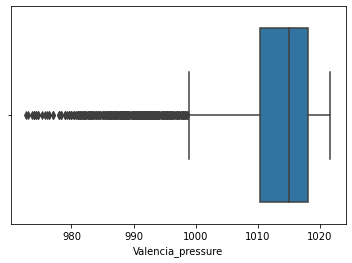

In [86]:
# Getting more information on column "Valencia_pressure"
sns.boxplot(df_train["Valencia_pressure"])

<AxesSubplot:ylabel='Frequency'>

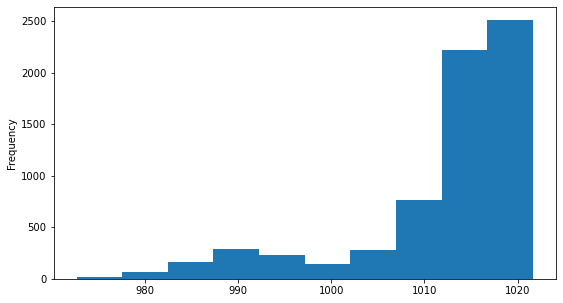

In [87]:
# Plotting the distribution of the column
df_train["Valencia_pressure"].plot(kind="hist", figsize = (9,5))

**Note**: The boxplot shows a large presence of outliers in which the values can effectively affect the value of the mean. Also, the distribution of the column shows that it is skewed hence, the preferred replacement for the missing values will be the `median` of the values in the column. This will be done in the Data Engineering section

#### Survey on columns with `object` Data type

Since most columns in the data set of numerical data types, we will examine few columns with different datatypes. They include `time`, `Seville_pressure` and `Valencia_wind_deg`.

In [88]:
# Getting more information on column "seville_pressure"
df_train["Seville_pressure"]

0       sp25
1       sp25
2       sp25
3       sp25
4       sp25
        ... 
8758    sp23
8759    sp23
8760    sp22
8761    sp23
8762    sp25
Name: Seville_pressure, Length: 8763, dtype: object

In [89]:
# Checking for the count of different values
df_train["Seville_pressure"].value_counts()

sp13    500
sp10    460
sp8     418
sp6     411
sp25    410
sp21    408
sp24    405
sp4     404
sp17    401
sp18    395
sp22    392
sp16    392
sp12    378
sp5     372
sp19    357
sp20    340
sp23    339
sp15    326
sp2     325
sp3     309
sp1     270
sp14    255
sp9     183
sp7     174
sp11    139
Name: Seville_pressure, dtype: int64

<AxesSubplot:>

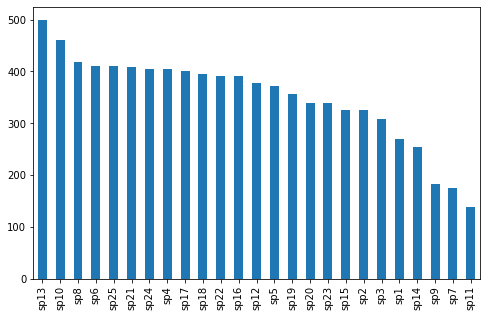

In [90]:
# Visualizing the count of different values
df_train["Seville_pressure"].value_counts().sort_values(ascending=False).plot(kind="bar", figsize=(8,5))

**Q1**: What does sp13 mean for the distribution?

In [91]:
# Getting more information on column "Valencia_wind_deg"
df_train["Valencia_wind_deg"]

0        level_5
1       level_10
2        level_9
3        level_8
4        level_7
          ...   
8758     level_6
8759     level_6
8760     level_9
8761     level_8
8762     level_9
Name: Valencia_wind_deg, Length: 8763, dtype: object

In [92]:
# Checking the count of different values
df_train["Valencia_wind_deg"].value_counts()

level_1     1072
level_5      915
level_4      914
level_3      890
level_7      882
level_6      881
level_2      874
level_10     839
level_8      798
level_9      698
Name: Valencia_wind_deg, dtype: int64

<AxesSubplot:>

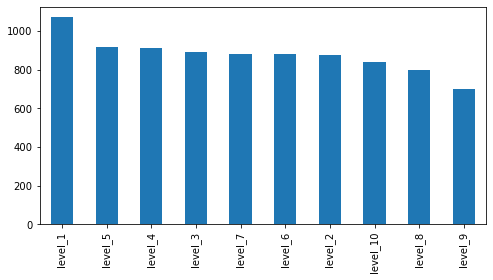

In [93]:
# Visualizing the count of different values
df_train["Valencia_wind_deg"].value_counts().sort_values(ascending=False).plot(kind="bar", figsize=(8,4))

**Q2**: What does the different levels of wind_deg signify?

In [94]:
# Getting more information on column "time"
df_train["time"]

0       2015-01-01 03:00:00
1       2015-01-01 06:00:00
2       2015-01-01 09:00:00
3       2015-01-01 12:00:00
4       2015-01-01 15:00:00
               ...         
8758    2017-12-31 09:00:00
8759    2017-12-31 12:00:00
8760    2017-12-31 15:00:00
8761    2017-12-31 18:00:00
8762    2017-12-31 21:00:00
Name: time, Length: 8763, dtype: object

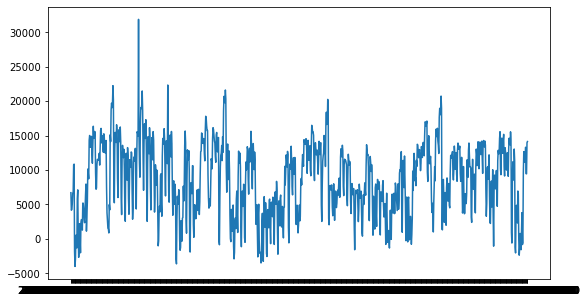

In [95]:
# Plotting the target variable `load_shortfall_3h` vs time 
plt.figure(figsize=(9,5))
plt.plot(df_train["time"][:1000], df_train["load_shortfall_3h"][:1000]) # For the 1st 1000 rows

**NOTE**: As seen in the plot above, matplotlib trys to plot all the time values on the x-axis messing up the labels in the process. To resolve this issue, the `time` column will be converted to `datetime` datatype in the Data Engineering section.

<AxesSubplot:>

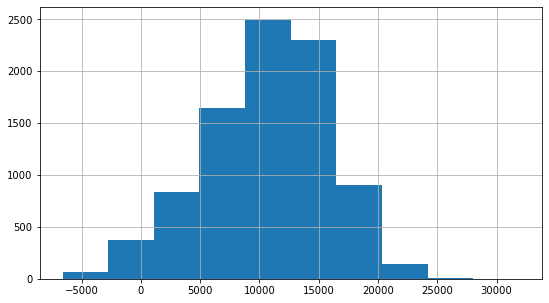

In [96]:
# Plotting a distribution of the "lord_shortfall_3h" values
plt.figure(figsize=(9,5))
df_train["load_shortfall_3h"].hist()

**NOTE**: The dependent variable `load_shortfall_3h` is normally distributed hence the Linear Regression model can be used to make predictions. Worth mentioning:

* Presence of negative values

In [97]:
# Make correlation matrix
df_train.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,...,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,-0.140583,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,-0.155738,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800


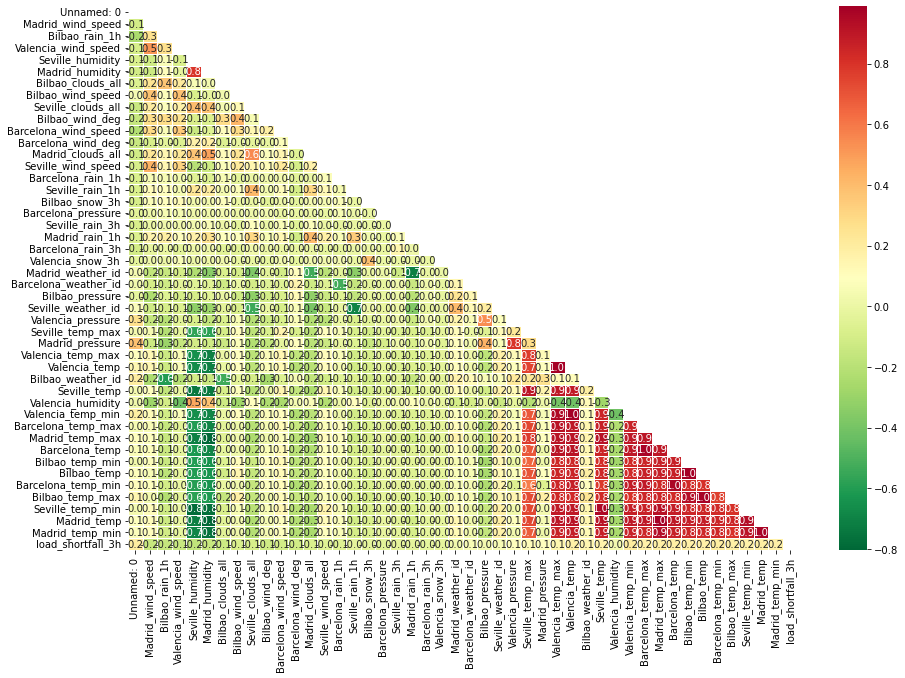

In [98]:
# Creating a visual of the correlation matrix
corr_matrix = df_train.corr() 
mask=np.triu(np.ones_like(corr_matrix,dtype=bool))
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.90,
                fmt=".1f",
                cmap="RdYlGn_r",
                mask=mask);

tri_df=corr_matrix.mask(mask)


In [99]:
# look at data statistics

In [100]:
# plot relevant feature interactions

In [101]:
# evaluate correlation

In [102]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In this section, we will be handling various data cleaning and preprocessing operations including; dropping some columns, filling null values, changing the data type of some columns and converting some columns to numerical values

#### Parsing Dates

Because we have time series data available `df["time"]`, we will enrich the time & date components as much as possible.

This is done by using the "parse_dates" parameter in pandas to the columns that has the dates

In [103]:
# reloading data to convert time column data type from object to date_time
df_train = pd.read_csv("df_train.csv", parse_dates=['time'])

In [104]:
# checking to see if the conversion was done correctly
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            8763 non-null   int64         
 1   time                  8763 non-null   datetime64[ns]
 2   Madrid_wind_speed     8763 non-null   float64       
 3   Valencia_wind_deg     8763 non-null   object        
 4   Bilbao_rain_1h        8763 non-null   float64       
 5   Valencia_wind_speed   8763 non-null   float64       
 6   Seville_humidity      8763 non-null   float64       
 7   Madrid_humidity       8763 non-null   float64       
 8   Bilbao_clouds_all     8763 non-null   float64       
 9   Bilbao_wind_speed     8763 non-null   float64       
 10  Seville_clouds_all    8763 non-null   float64       
 11  Bilbao_wind_deg       8763 non-null   float64       
 12  Barcelona_wind_speed  8763 non-null   float64       
 13  Barcelona_wind_deg

##### Add datetime parameter to `time` column

To further enrich the the `time`. We will add time paremeters `year`, `month`, `day` and hours as columns in the dataset.

In [105]:
df_train["Year"] = df_train['time'].dt.year
df_train["Month"] = df_train['time'].dt.month
df_train["Day"] = df_train['time'].dt.day
df_train['hour'] = df_train['time'].dt.hour

In [106]:
df_train.dtypes

Unnamed: 0                       int64
time                    datetime64[ns]
Madrid_wind_speed              float64
Valencia_wind_deg               object
Bilbao_rain_1h                 float64
Valencia_wind_speed            float64
Seville_humidity               float64
Madrid_humidity                float64
Bilbao_clouds_all              float64
Bilbao_wind_speed              float64
Seville_clouds_all             float64
Bilbao_wind_deg                float64
Barcelona_wind_speed           float64
Barcelona_wind_deg             float64
Madrid_clouds_all              float64
Seville_wind_speed             float64
Barcelona_rain_1h              float64
Seville_pressure                object
Seville_rain_1h                float64
Bilbao_snow_3h                 float64
Barcelona_pressure             float64
Seville_rain_3h                float64
Madrid_rain_1h                 float64
Barcelona_rain_3h              float64
Valencia_snow_3h               float64
Madrid_weather_id        

#### Dropping Columns

In [107]:
# # dropping the 'UNnamed: 0' column
# df_train.drop(['Unnamed: 0', 'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
#        'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
#        'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
#        'Madrid_temp'], axis= 1, inplace = True)

In [108]:
df_train.drop('Unnamed: 0', axis=1, inplace=True)

In [109]:
# Checking if column still exists in dataframe
col = "Unnamed: 0"
if col in df_train.columns:
    print("Yes")
else:
    print("Not in Dataframe")

Not in Dataframe


In [110]:
# dropping the 'time' column
df_train.drop('time', axis= 1, inplace = True)

#### Replacing Null Values

In [111]:
# Creating summary statistics for Valencia_pressure column
mean = int(df_train['Valencia_pressure'].mean())
median =  int(df_train['Valencia_pressure'].median())
mode = int(df_train['Valencia_pressure'].mode())
print(f'mean: {mode}')
print(f'median: {median}')
print(f'mode: {mode}')


mean: 1018
median: 1015
mode: 1018


In [112]:
# replace the null values in the Valencia_pressure column with the median of the data
df_train['Valencia_pressure'] = df_train['Valencia_pressure'].fillna(df_train['Valencia_pressure'].median())

In [113]:
#lets check if all the null values has being replaced approipraitely
df_train.isnull().sum()

Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_max         0
Barcelona_te

#### Converting required columns to numerical values

`Seville_pressure` and `Valencia_wind_deg`  columns are not of numerical datatype, to fit a model all variable columns must be of numerical datatype. We would be using the get_dummies method to transform the objects datatype to numerical values.

In [114]:
#df_train = pd.get_dummies(df_train, drop_first=True)

lets access the new columns

In [115]:
df_train.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,hour
0,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3
1,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,6
2,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,9
3,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1,12
4,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1,15


we can see that all the categorical colums has being replaced with binary numbers. Also the amount of columns and has increased to 82. lets check information abot the data type to access the datatypes after the change.

In [116]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     8763 non-null   float64
 1   Valencia_wind_deg     8763 non-null   object 
 2   Bilbao_rain_1h        8763 non-null   float64
 3   Valencia_wind_speed   8763 non-null   float64
 4   Seville_humidity      8763 non-null   float64
 5   Madrid_humidity       8763 non-null   float64
 6   Bilbao_clouds_all     8763 non-null   float64
 7   Bilbao_wind_speed     8763 non-null   float64
 8   Seville_clouds_all    8763 non-null   float64
 9   Bilbao_wind_deg       8763 non-null   float64
 10  Barcelona_wind_speed  8763 non-null   float64
 11  Barcelona_wind_deg    8763 non-null   float64
 12  Madrid_clouds_all     8763 non-null   float64
 13  Seville_wind_speed    8763 non-null   float64
 14  Barcelona_rain_1h     8763 non-null   float64
 15  Seville_pressure     

We can see that all the object datatype has changed to either floats or ints. We can now use this for further analysis.

In [117]:
# # Converting columns to numerical datatype

df_train['Valencia_wind_deg'] = df_train['Valencia_wind_deg'].str.extract('(\d+)')
df_train['Valencia_wind_deg'] = pd.to_numeric(df_train['Valencia_wind_deg'])
df_train['Seville_pressure'] = df_train['Seville_pressure'].str.extract('(\d+)')
df_train['Seville_pressure'] = pd.to_numeric(df_train['Seville_pressure'])

In [118]:
df_train.dtypes

Madrid_wind_speed       float64
Valencia_wind_deg         int64
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure          int64
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_pressure         float64
Valencia_temp_max       float64
Valencia

In [119]:
# Checking 
df_train.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,hour
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,6
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,9
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1,12
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1,15


In [120]:
df_train.corr()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,hour
Madrid_wind_speed,1.000000,0.121835,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981,-0.031553,-0.237445,-0.029954,0.186228
Valencia_wind_deg,0.121835,1.000000,0.199288,0.292731,0.240007,0.253549,0.158266,0.075864,0.085519,0.157252,...,-0.240981,-0.292904,-0.311775,-0.337965,-0.316603,-0.188674,-0.057513,-0.140195,-0.010627,-0.138415
Bilbao_rain_1h,0.259719,0.199288,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510,-0.200747,-0.188274,0.072752,0.054527
Valencia_wind_speed,0.513092,0.292731,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791,-0.012650,-0.237156,-0.000340,0.204103
Seville_humidity,-0.117892,0.240007,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290,-0.045730,-0.111622,0.032979,-0.424982
Madrid_humidity,-0.137092,0.253549,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536,-0.084456,-0.076567,0.047372,-0.307872
Bilbao_clouds_all,0.244001,0.158266,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293,-0.031658,-0.117452,0.025688,-0.023714
Bilbao_wind_speed,0.377854,0.075864,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602,0.082611,-0.086698,-0.008020,0.197848
Seville_clouds_all,0.191251,0.085519,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804,-0.089657,-0.170345,0.010582,-0.017401
Bilbao_wind_deg,0.270950,0.157252,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800,-0.104647,-0.174941,0.034253,0.110457


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

Here we are going to split our data to target and feature variables, then choose the machine learning model to train our feature variables on using `sklearn`. 

In Scikit-Learn, machine learning models are referred to as estimators.

In this case, since we're working on a regression problem, we've chosen the RandomForestClassifier estimator which is part of the ensembles module.

In [121]:
# Create targets and features dataset
X = df_train.drop(['load_shortfall_3h'], axis = 1) # Features dataset
y = df_train['load_shortfall_3h'] # Targets dataset

In [122]:
X.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Year,Month,Day,hour
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,2015,1,1,3
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,2015,1,1,6
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,2015,1,1,9
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,2015,1,1,12
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,2015,1,1,15


In [123]:
y.head()

0    6715.666667
1    4171.666667
2    4274.666667
3    5075.666667
4    6620.666667
Name: load_shortfall_3h, dtype: float64

#### Feature Scaling

Feature scaling is generally performed during the data pre-processing stage, before training models using machine learning algorithms. Feature scaling is a method used to standardize the range of independent variables or features of data. Feature scaling can be accomplished using a variety of methods, including min-max scaling, z-score standardization, and decimal scaling.

In this project, we will be using z-score standardization for our feature scaling. This is preferred because of its robustness to the presence of of outliers in the data as seen in columns such as `valencia_pressure` or even the `load_shortfall_3h`

In [124]:
# Creating the scaler object
scaler = StandardScaler()

In [125]:
# Create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)

In [126]:
# Converting scaled predictor values into a Dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Year,Month,Day,hour
0,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,...,-2.505658,-1.218309,-2.621665,-2.125118,-2.405393,-2.309892,-1.226179,-1.602429,-1.675368,-1.090901
1,-1.130863,1.641580,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,...,-2.353511,-1.292271,-2.475661,-2.040702,-2.357388,-2.261154,-1.226179,-1.602429,-1.675368,-0.654451
2,-0.770554,1.294054,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,...,-1.671342,-1.124792,-1.821036,-1.570279,-1.680968,-1.574407,-1.226179,-1.602429,-1.675368,-0.218001
3,-0.770554,0.946527,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,...,-0.775541,-0.821553,-0.961406,-0.762967,-0.698057,-0.576488,-1.226179,-1.602429,-1.675368,0.218449
4,-0.770554,0.599000,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,...,-0.611717,-0.693885,-0.804197,-0.748327,-0.828246,-0.708665,-1.226179,-1.602429,-1.675368,0.654899


#### Splitting Standardized data

We will split `X_Standardise` and `y` into train and validation sets before training it with the models

In [127]:
# Split data X&y into train and validation sets
np.random.seed(42) # so we can reproduce our results

# Split into train & test set
X_train, X_val, y_train, y_val = train_test_split(X_standardise,
                                                   y,
                                                   test_size=0.2)

Having splited our data into training and val sets, we can go ahead to build a machine learning model.

The model will trained(find the patterns) on the training set.

And we will test it(use the patterns) first on the val set.

We will experiment using 5 different machine learning models:
1. Linear Regression
2. Lasso
3. Ridge
4. DecisionTreeRegressor
5. Random Forest Regressor

In [128]:
# Creating a dictionary for the models starting with Linear Regression
models ={"Linear Regression": LinearRegression(),
        "AdaBoost": AdaBoostRegressor(n_estimators=5, random_state=42),
        "Random_Forest": RandomForestRegressor(n_jobs=-1,random_state=42),
        "Lasso": Lasso(alpha=0.01),
        "Regr_Decision_tree": DecisionTreeRegressor(max_depth=2,random_state=42)}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_val, y_train, y_val):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data 
    X_val: val deata (for testing, no labels)
    y_tain: training labels
    y_test val labels
    """
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        y_pred = model.predict(X_val)
        model_scores[name] = np.sqrt(mean_squared_error(y_val, y_pred))
    return model_scores

In [129]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_val=X_val,
                             y_train=y_train,
                             y_val=y_val)

model_scores

{'Linear Regression': 4814.926871475224,
 'AdaBoost': 4473.193151789603,
 'Random_Forest': 3219.215394790895,
 'Lasso': 4816.636582864576,
 'Regr_Decision_tree': 4896.37417831227}

#### Make predictions on test dataset

We will use the model to predict the `load_shortfall_3h` for the test dataset `df_test` provided. The predictions made with the model will be submitted as the **first_submission_file** on Kaggle competition website

In [130]:
df_test

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000


In [131]:
df_test_copy = df_test.copy()
df_test_copy

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000


In [132]:
# Checking test data set
df_test_copy.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [133]:
df_test_copy.isna().sum()

Unnamed: 0                0
time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp        

In [134]:
df_test_copy.dtypes

Unnamed: 0                int64
time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h            int64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h          int64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_p

#### Preprocessing the test data set 

In this section, we going to create a function to get the test datset in same format as our training dataset. A function is appllied so it can be repeated across any dataset provided. The function will take the dataset and process it to return in the same fortmat as training set

In [135]:
def preprocess_data(df):
    """
    Performs transformations on the df and return transformed df
    """
    # Converting the time column to datetime format
    df["time"] = pd.to_datetime(df["time"])
    
    # Enriching the dataframe by obtaining datetime parameters
    
    df["Year"] = df['time'].dt.year
    df["Month"] = df['time'].dt.month
    df["Day"] = df['time'].dt.day
    df['hour'] = df['time'].dt.hour
    
    # Dropping columns
    df.drop("Unnamed: 0", axis=1, inplace=True)
#     df.drop(['Unnamed: 0', 'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
#        'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
#        'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
#        'Madrid_temp'], axis= 1, inplace = True)
    df.drop("time", axis= 1, inplace = True)
    
    # replace the null values in the Valencia_pressure column with the median of the data
    df['Valencia_pressure'] = df['Valencia_pressure'].fillna(df['Valencia_pressure'].median())
    
    # Converting columns to numerical datatype
    #df = pd.get_dummies(df, drop_first=True)
    df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str.extract('(\d+)')
    df['Valencia_wind_deg'] = pd.to_numeric(df['Valencia_wind_deg'])
    df['Seville_pressure'] = df['Seville_pressure'].str.extract('(\d+)')
    df['Seville_pressure'] = pd.to_numeric(df['Seville_pressure'])
    
    # Scaling the test dataset
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    df_stan = pd.DataFrame(df_scaled, columns=df.columns)
    
    return df_stan

In [136]:
# Process the test data
df_test_copy = preprocess_data(df_test_copy)

In [137]:
df_test_copy

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Year,Month,Day,hour
0,1.432590,0.703345,-0.440268,0.995600,0.964514,0.360022,-0.766227,0.433023,-0.612116,0.314013,...,-0.946256,-0.322082,-0.535933,-0.885760,-0.891613,-0.855293,0.0,-1.602745,-1.673503,-1.527525
1,1.244747,0.703345,-0.440268,1.162600,1.061565,0.636255,-1.422372,0.835964,-0.612116,-0.197584,...,-0.849202,-0.787188,-0.696698,-1.138747,-0.966628,-0.969818,0.0,-1.602745,-1.673503,-1.091089
2,-0.070152,0.337515,-0.440268,0.995600,1.061565,1.119662,-1.422372,0.030083,-0.348454,-0.334010,...,-1.128553,-1.019741,-1.018228,-1.223075,-1.284514,-1.198870,0.0,-1.602745,-1.673503,-0.654654
3,0.117691,0.337515,-0.440268,1.162600,1.271842,0.829617,-0.547512,2.044786,-0.348454,0.348120,...,-0.736743,-0.973231,-0.643109,-1.391733,-1.327592,-1.389746,0.0,-1.602745,-1.673503,-0.218218
4,0.869062,0.337515,-0.440268,2.832609,-0.086869,0.056166,-0.547512,5.066840,-0.612116,0.723291,...,-0.370608,-0.415103,-0.267991,-0.717102,-0.800258,-0.740767,0.0,-1.602745,-1.673503,0.218218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,-1.197208,1.069175,-0.440268,-0.507408,0.705712,-0.537733,1.202207,-0.574328,-0.612116,-0.947927,...,-2.050821,-1.763911,-1.982818,-1.307404,-1.443828,-1.771498,0.0,1.587648,1.737042,-0.218218
2916,-1.197208,0.703345,-0.440268,-0.841410,-0.297146,-1.421677,0.436705,-0.775799,-0.612116,-1.288991,...,-1.244606,-0.461614,-1.554111,-0.379787,-0.525079,-0.702592,0.0,1.587648,1.737042,0.218218
2917,-0.821522,-0.028314,-0.440268,-0.006406,-0.976502,-1.504547,-1.422372,-0.977269,-0.612116,-1.514094,...,-0.223230,-0.136040,-0.428756,0.084021,-0.015199,-0.015438,0.0,1.587648,1.737042,0.654654
2918,-0.821522,-0.028314,-0.440268,-0.507408,-0.701524,-0.247689,-1.422372,-0.977269,-0.612116,-1.469756,...,-0.754202,-0.833699,-0.911051,-0.337623,-0.451921,-0.511716,0.0,1.587648,1.737042,1.091089


In [138]:
df_test_copy.dtypes

Madrid_wind_speed       float64
Valencia_wind_deg       float64
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure        float64
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_pressure         float64
Valencia_temp_max       float64
Valencia

In [139]:
# Making predictions on df_test
for values in models.values():
    
    print(values)
    preds = values.predict(df_test_copy)
preds

LinearRegression()
AdaBoostRegressor(n_estimators=5, random_state=42)
RandomForestRegressor(n_jobs=-1, random_state=42)
Lasso(alpha=0.01)
DecisionTreeRegressor(max_depth=2, random_state=42)


array([ 8926.85806452,  8926.85806452,  8926.85806452, ...,
       12488.59186732, 12488.59186732, 12488.59186732])

#### Formatting predictions to submission style

In [140]:
# Converting the prediction to DataFrame
d1=pd.DataFrame(preds, columns=["load_shortfall_3h"])
d1

,load_shortfall_3h
0,8926.858065
1,8926.858065
2,8926.858065
3,8926.858065
4,8926.858065
...,...
2915,12488.591867
2916,12488.591867
2917,12488.591867
2918,12488.591867


In [141]:
# Joining d1 to have time column
d2 = pd.DataFrame({"time": df_test["time"]})
d1_submission = d2.join(d1)
d1_submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,8926.858065
1,2018-01-01 03:00:00,8926.858065
2,2018-01-01 06:00:00,8926.858065
3,2018-01-01 09:00:00,8926.858065
4,2018-01-01 12:00:00,8926.858065
...,...,...
2915,2018-12-31 09:00:00,12488.591867
2916,2018-12-31 12:00:00,12488.591867
2917,2018-12-31 15:00:00,12488.591867
2918,2018-12-31 18:00:00,12488.591867


In [142]:
d2_submission = d1_submission
d2_submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,8926.858065
1,2018-01-01 03:00:00,8926.858065
2,2018-01-01 06:00:00,8926.858065
3,2018-01-01 09:00:00,8926.858065
4,2018-01-01 12:00:00,8926.858065
...,...,...
2915,2018-12-31 09:00:00,12488.591867
2916,2018-12-31 12:00:00,12488.591867
2917,2018-12-31 15:00:00,12488.591867
2918,2018-12-31 18:00:00,12488.591867


In [143]:
# Creating file in csv
d1_submission.to_csv("d1_submission.csv", index=False)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

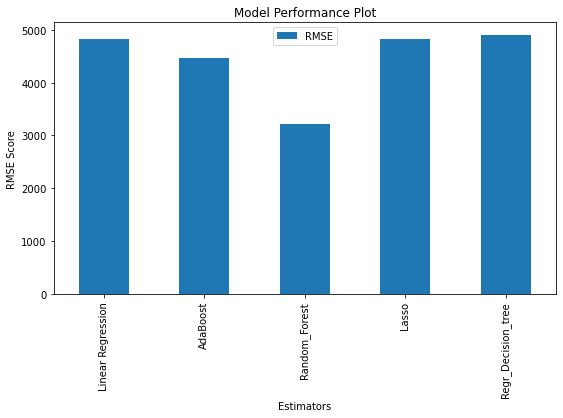

In [145]:
# Compare model performance
model_compare = pd.DataFrame(model_scores, index=["RMSE"])
model_compare.T.plot.bar(figsize=(9,5), title="Model Performance Plot")
plt.xlabel("Estimators")
plt.ylabel("RMSE Score");


Based on the RMSE score performance, we can see that `RandomForestRegressor()` gives the lowest RMSE score. We will select RandomForest as our choice model and perform some hyperparameter tuning to try and improve its score using `RandomizedSearchCV` cross validation

### Hyperparameter tuning with RandomizedSearchCV

Hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins

In [72]:
# Obtaining list of models used
model_list = list(models.values())
model_list

[LinearRegression(),
 AdaBoostRegressor(n_estimators=5, random_state=42),
 RandomForestRegressor(n_jobs=-1, random_state=42),
 Lasso(alpha=0.01),
 DecisionTreeRegressor(max_depth=2, random_state=42)]

We will be tuning the parameters of the `RandomForestRegressor()` model to find the ideal parameters

In [146]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10), 
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2),
          "max_features": [0.5, 1, "sqrt", "auto"]}

# Instantiate RandomizedSearcgCV model 
rs_model = RandomizedSearchCV(model_list[2],
                             param_distributions=rf_grid,
                             n_iter=5,
                             cv=10,
                             verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
CPU times: total: 17 s
Wall time: 1min 27s


RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [147]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 14,
 'min_samples_leaf': 15,
 'max_features': 'sqrt',
 'max_depth': 10}

### Train a model with the best hyperparameters

Note: These hyperparameters were found by Daniel after running 100 iterations which took over 2hrs computing time with `RandomizedSearchCV`

In [152]:
%%time

# Most ideal hyperparametres
ideal_model = RandomForestRegressor(n_estimators=80,
                                   min_samples_leaf=11,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   max_depth=None,
                                   random_state=42) #so the results are reproducables

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 9.75 s
Wall time: 11.1 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=11,
                      min_samples_split=14, n_estimators=80, random_state=42)

In [153]:
def show_scores(model):
    train_preds = ideal_model.predict(X_train)
    val_preds = ideal_model.predict(X_val)
    # If val_preds does better than train_preds, we can say the model is 
    scores = {"Training RMSE": np.sqrt(mean_squared_error(y_train, train_preds)),
             "Valid RMSE": np.sqrt(mean_squared_error(y_val, val_preds))}
    return scores

In [154]:
plot_score = show_scores(ideal_model)
plot_score

{'Training RMSE': 2662.3629191256136, 'Valid RMSE': 3486.189033036857}

Text(0, 0.5, 'RMSE Score')

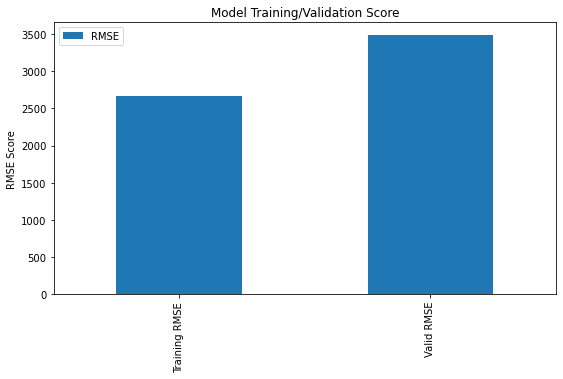

In [155]:
plotting_score = pd.DataFrame(plot_score, index=["RMSE"])
plotting_score.T.plot.bar(figsize=(9,5), title="Model Training/Validation Score")
plt.ylabel("RMSE Score")

In [156]:
y_predicty = ideal_model.predict(df_test_copy)
y_predicty

array([ 7604.85063689,  4694.9631985 ,  4860.40356989, ...,
       13319.73908207, 14294.39499405, 14892.59204995])

In [157]:
d_11=pd.DataFrame(y_predicty, columns=["load_shortfall_3h"])
d_11

,load_shortfall_3h
0,7604.850637
1,4694.963198
2,4860.403570
3,6969.744939
4,6867.067808
...,...
2915,13065.396316
2916,13675.834714
2917,13319.739082
2918,14294.394994


In [158]:
# Joining d1 to have time column
d_12 = pd.DataFrame({"time": df_test["time"]})
d11_submission = d_12.join(d_11)
d11_submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,7604.850637
1,2018-01-01 03:00:00,4694.963198
2,2018-01-01 06:00:00,4860.403570
3,2018-01-01 09:00:00,6969.744939
4,2018-01-01 12:00:00,6867.067808
...,...,...
2915,2018-12-31 09:00:00,13065.396316
2916,2018-12-31 12:00:00,13675.834714
2917,2018-12-31 15:00:00,13319.739082
2918,2018-12-31 18:00:00,14294.394994


In [159]:
# Creating file in csv
d11_submission.to_csv(r"C:\Users\USER\Desktop\AR_TEAM1_REG\AR_Team1_Regression_Predict_Kaggle\d11_submission.csv", index=False)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic